# K-Nearest Neighbors Classifier

K-Nearest Neighbors (KNN) is a classification algorithm. The central idea is that data points with similar attributes tend to fall into similar categories.

If you have a dataset of points where the class of each point is known, you can take a new point with an unknown class, find it’s nearest neighbors, and classify it.

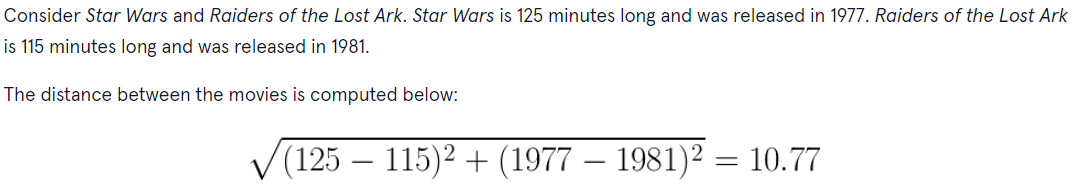

In [10]:
star_wars = [125, 1977]
raiders = [115, 1981]
mean_girls = [97, 2004]

def distance(movie1, movie2):
  a = (movie1[0] - movie2[0]) ** 2
  b = (movie1[1] - movie2[1]) ** 2
  return (a + b) ** 0.5

print(distance(star_wars, raiders))
print(distance(star_wars, mean_girls))

10.770329614269007
38.897300677553446


The three steps of the K-Nearest Neighbor Algorithm:

1. Normalize the data

2. Find the k nearest neighbors

3. Classify the new point based on those neighbors

## 1. Normalising data

For it to work, we need to normalize the data so every value is between 0 and 1

In [11]:
release_dates = [1897.0, 1998.0, 2000.0, 1948.0, 1962.0, 1950.0, 1975.0, 1960.0, 2017.0, 1937.0, 1968.0, 1996.0, 1944.0, 1891.0, 1995.0, 1948.0, 2011.0, 1965.0, 1891.0, 1978.0]

def min_max_normalize(lst):
  minimum = min(lst)
  maximum = max(lst)
  normalized = []
  
  for value in lst:
    normalized_num = (value - minimum) / (maximum - minimum)
    normalized.append(normalized_num)
  
  return normalized

print(min_max_normalize(release_dates))

[0.047619047619047616, 0.8492063492063492, 0.8650793650793651, 0.4523809523809524, 0.5634920634920635, 0.46825396825396826, 0.6666666666666666, 0.5476190476190477, 1.0, 0.36507936507936506, 0.6111111111111112, 0.8333333333333334, 0.42063492063492064, 0.0, 0.8253968253968254, 0.4523809523809524, 0.9523809523809523, 0.5873015873015873, 0.0, 0.6904761904761905]


## 2. Finding the Nearest Neighbors



In [12]:
from movies import movie_dataset, movie_labels, normalize_point

def distance(movie1, movie2):
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
  final_distance = squared_difference ** 0.5
  return final_distance

"""
Find the distance between each `point` and `unknown` 
Add `[distance_to_point, point]` to `distances`
Sort distances
Find the top 'k' values in distances
"""

def classify(unknown, dataset, labels, k):
  distances = []
  #Looping through all points in the dataset
  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    #Adding the distance and point associated with that distance
    distances.append([distance_to_point, title])
  distances.sort()
  #Taking only the k closest points
  neighbors = distances[0:k]
  num_good = 0
  num_bad = 0
  for neighbor in neighbors:
    title = neighbor[1]
    if labels[title] == 0:
      num_bad += 1
    elif labels[title] == 1:
      num_good += 1
  if num_good > num_bad:
    return 1
  else:
    return 0
print("Call Me By Your Name" in movie_dataset)

my_movie = [3500000, 132, 2017]

normalized_my_movie = normalize_point(my_movie)

classify(normalized_my_movie, movie_dataset, movie_labels, 5)

ModuleNotFoundError: No module named 'movies'

## Training and validation datasets

We need to check that what classifer predicts is actually correct. We do this by checking against a validation set.

## Choosing K

The validation accuracy changes as k changes. The first situation that will be useful to consider is when k is very small. Let’s say k = 1. We would expect the validation accuracy to be fairly low due to overfitting. In the case of K-Nearest Neighbors, overfitting happens when you don’t consider enough neighbors. A single outlier could drastically determine the label of an unknown point

On the other hand, if k is very large, our classifier will suffer from underfitting. Underfitting occurs when your classifier doesn’t pay enough attention to the small quirks in the training set. Imagine you have 100 points in your training set and you set k = 100. Every single unknown point will be classified in the same exact way. The distances between the points don’t matter at all! This is an extreme example, however, it demonstrates how the classifier can lose understanding of the training data if k is too big.

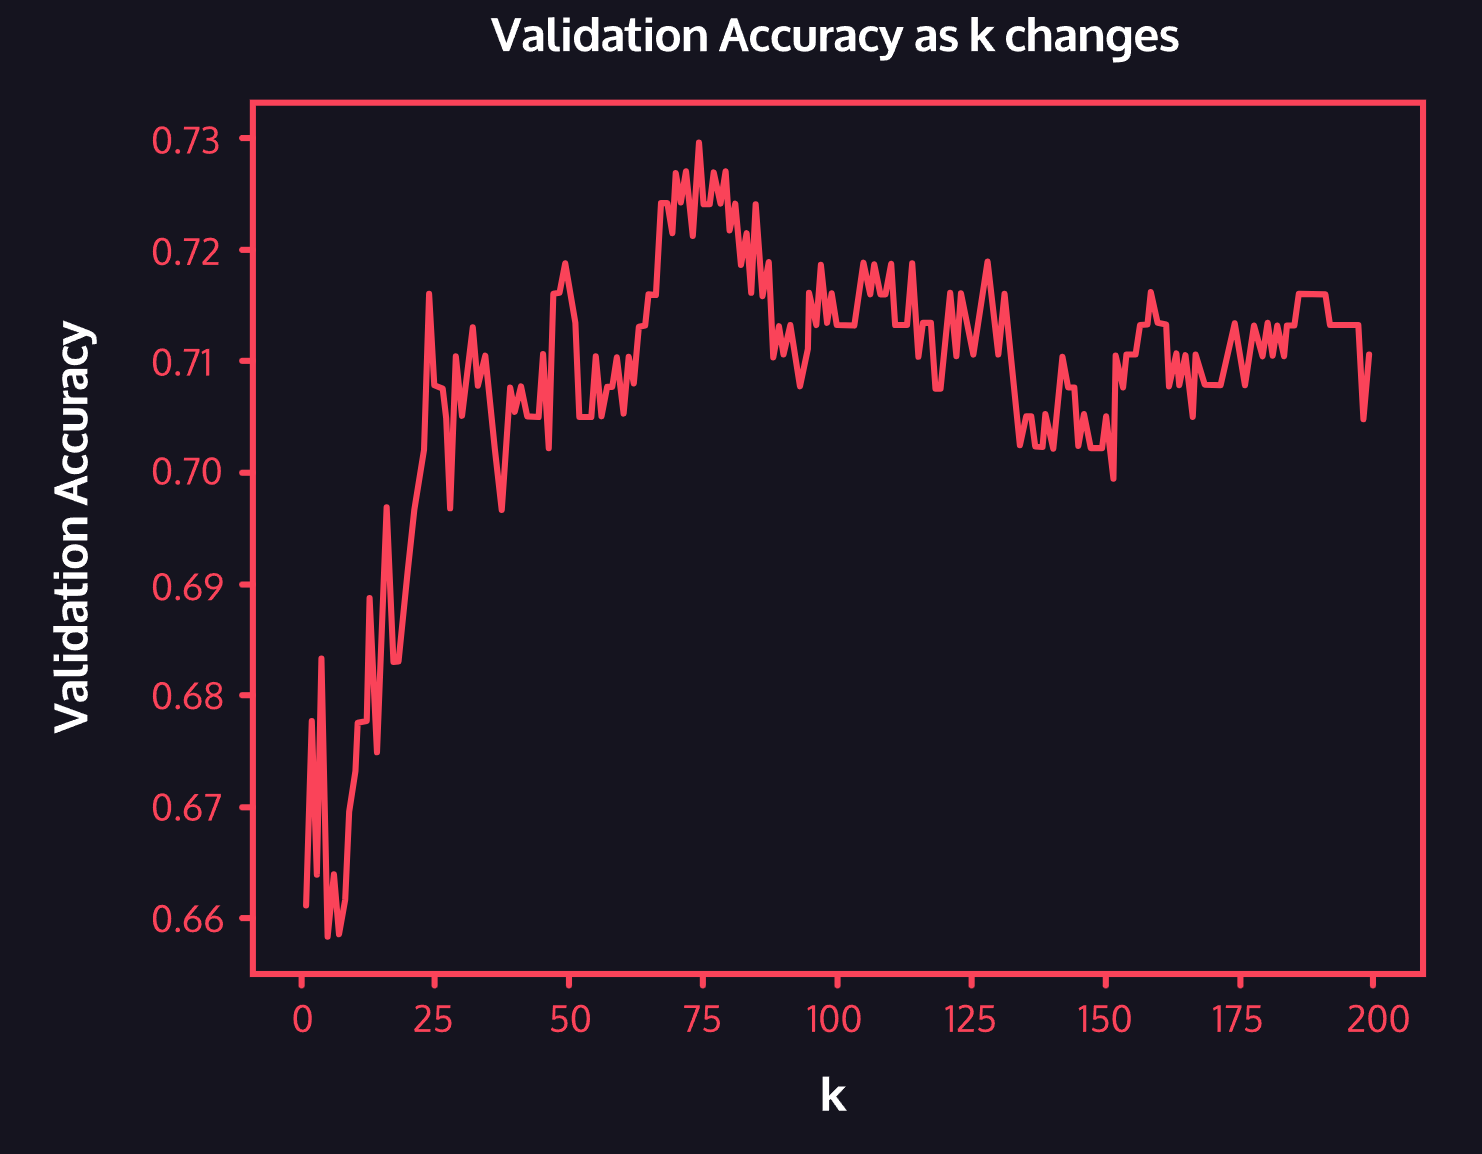



In [ ]:
from sklearn import KNeighboursClassifier

# the code below will create a classifier where k = 3
classifier = KNeighborsClassifier(n_neighbors = 3)

# Next, we’ll need to train our classifier. 
# The .fit() method takes two parameters. 
# The first is a list of points, and the second is the labels associated with those points. 
# # So for our movie example, we might have something like this
training_points = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]

training_labels = [0, 1, 1]
classifier.fit(training_points, training_labels)

# after training the model, we can classify new points. 
# The .predict() method takes a list of points that you want to classify. 
# It returns a list of its guesses for those points.
unknown_points = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]

guesses = classifier.predict(unknown_points)

- Data with n features can be conceptualized as points lying in n-dimensional space.
- Data points can be compared by using the distance formula. Data points that are similar will have a smaller distance between them.
- A point with an unknown class can be classified by finding the k nearest neighbors
- To verify the effectiveness of a classifier, data with known classes can be split into a training set and a validation set. Validation error can then be calculated.
- Classifiers have parameters that can be tuned to increase their effectiveness. In the case of K-Nearest Neighbors, k can be changed.
- A classifier can be trained improperly and suffer from overfitting or underfitting. In the case of K-Nearest Neighbors, a low k often leads to overfitting and a large k often leads to underfitting.
- Python’s sklearn library can be used for many classification and machine learning algorithms.

In [ ]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()

# Print some data and the feature names
display(breast_cancer_data.data[0])
display(breast_cancer_data.feature_names)

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
display(breast_cancer_data.target)
display(breast_cancer_data.target_names)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

array(['malignant', 'benign'], dtype='<U9')

Call the train_test_split function. It takes several parameters:

- The data you want to split (for us breast_cancer_data.data)
- The labels associated with that data (for us, breast_cancer_data.target).
- The test_size. This is what percentage of your data you want to be in your testing set. Let’s use test_size = 0.2
- random_state. This will ensure that every time you run your code, the data is split in the same way. This can be any number. We used random_state = 100.

In [13]:
from sklearn.model_selection import train_test_split

training_data, validation_data, training_labels, validation_labels = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size = 0.2, random_state = 100)

Confim it worked correctly by checking length of data

In [14]:
print(len(training_data))
print(len(training_labels))

455
455


In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Create classifier
# Train using fit function
# Find out how accurate it is using score
k_list = range(1,101)
accuracies = []
for i in k_list:
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(training_data, training_labels)
    score = classifier.score(validation_data, validation_labels)
    accuracies.append(score)

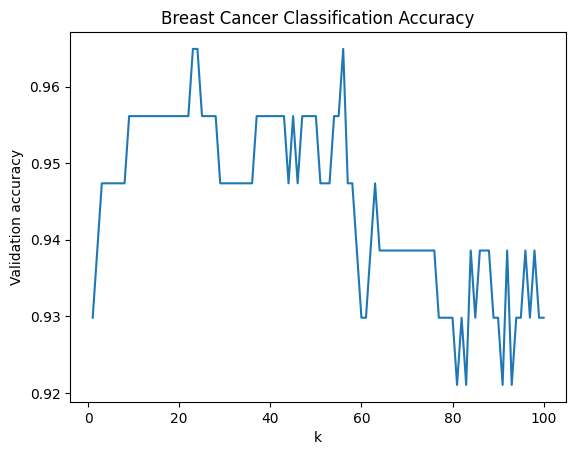

In [25]:
import matplotlib.pyplot as plt

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation accuracy")
plt.title("Breast Cancer Classification Accuracy")
plt.show()



## K-NEAREST NEIGHBOR REGRESSOR

This process is almost identical to classification, except for the final step. Once again, we are going to find the k nearest neighbors of the new movie by using the distance formula. However, instead of counting the number of good and bad neighbors, the regressor averages their IMDb ratings.

For example, if the three nearest neighbors to an unrated movie have ratings of 5.0, 9.2, and 6.8, then we could predict that this new movie will have a rating of 7.0.

## Weighted Regression

We’re off to a good start, but we can be even more clever in the way that we compute the average. We can compute a weighted average based on how close each neighbor is.

In [2]:
from sklearn.neighbors import KNeighborsRegressor
classifier = KNeighborsRegressor(n_neighbors = 3, weights = "distance")

# Next, we need to fit the model to our training data using the .fit() method. .fit() takes two parameters. 
# The first is a list of points, and the second is a list of values associated with those points.
training_points = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]

training_labels = [5.0, 6.8, 9.0]
classifier.fit(training_points, training_labels)

# Finally, we can make predictions on new data points using the .predict() method. 
# .predict() takes a list of points and returns a list of predictions for those points.
unknown_points = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]

guesses = classifier.predict(unknown_points)
print(guesses)


[7.28143288 7.76451922 6.8457845 ]
